### Name : Shubham Agrawal
### Roll No. : 2019201085
### CV Assignment 1

### Libraries Used

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import cv2
import string, os

calib-object.jpg	 IMG_5457.JPG  IMG_5461.JPG  IMG_5465.JPG  IMG_5469.JPG
calib-object-legend.jpg  IMG_5458.JPG  IMG_5462.JPG  IMG_5466.JPG  IMG_5470.JPG
example-wireframe.png	 IMG_5459.JPG  IMG_5463.JPG  IMG_5467.JPG
IMG_5456.JPG		 IMG_5460.JPG  IMG_5464.JPG  IMG_5468.JPG


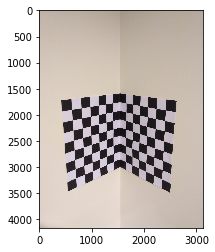

In [32]:
!ls ../calibration-data
img = plt.imread("../calibration-data/calib-object.jpg")
plt.imshow(img)

# Q1: DLT

## Q1.1 - for scale = 28*28mm

In [2]:
#World Coordinates
X = np.array([  
[0, 0, 84],
[0, 84, 0],
[28,28,0], 
[56,28,0],
[84,28,0],
[56,56,0],
[28,56,0],
[84,56,0],
[140,140,0],
[140,112,0],
[84,112,0],
[28,196,0],
[28,168,0],
[0,28,28],
[0,84,28],
[0,112,28],
[0,112,84],
[0,112,112],
[0,84,84],[0,56,84],
[0,56,112],
[0,84,140],
[0,140,140],
[0,168,196],
[0,224,112]
 ])

print("World Points : ", X.shape)


World Points :  (25, 3)


In [3]:
#Image Coordinates
x = np.array([
[1134, 1642],
[1543, 2089],
[1664,1783], 
[1792,1806],
[1928,1831],
[1789,1982],
[1663,1953],
[1923,2013],
[2203,2640],
[2210,2458],
[1914,2363],
[1657,2752],
[1776,2648],
[1412,1780],
[1415,2116],
[1418,2279],
[1146,2356],
[997,2398],
[1143,2183],
[1137,2007],
[984,2036],
[831,2259],
[849,2625],
[698,3038],
[1026,3078]])
print("Image Points : ", x.shape)

Image Points :  (25, 2)


## Function to Calculate P matrix

In [7]:
def find_P(x, X):
    G = []

    for i in range(len(X)):
        G.append([X[i][0], X[i][1], X[i][2], 1, 0, 0, 0, 0, (-x[i][0]) * X[i][0], (-x[i][0]) * X[i][1], (-x[i][0]) * X[i][2], -x[i][0]])
        G.append([0, 0, 0, 0, X[i][0], X[i][1], X[i][2], 1, (-x[i][1]) * X[i][0], (-x[i][1]) * X[i][1], (-x[i][1]) * X[i][2], -x[i][1]])

    G = np.array(G)
#     print(G.shape)
    
    u, s, vh = np.linalg.svd(G)
    p = vh[len(vh)-1, :]  # Row vector of vT corresponding to smallest eigen
    p34 = p[-1] 
    p = p / p34 
    P = p.reshape(3, 4)
    return P

In [21]:
P = find_P(x, X)
P

array([[ 3.34320169e+00,  5.09161645e-01, -5.75228371e+00,
         1.52004637e+03],
       [-9.92840908e-02,  6.28275334e+00, -7.87315596e-01,
         1.57929277e+03],
       [-6.79986987e-04,  1.67947641e-04, -9.70690387e-04,
         1.00000000e+00]])

### Q1.1.a) Perform reconstruction on the original data points.

In [160]:
Xx = np.c_[ X, np.ones(X.shape[0]) ]  
print(Xx.shape)
Reconst_matrix = np.matmul(P, Xx.T)
print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
print(Reconst_matrix)

(25, 4)
(3, 25)
[[1.12890302e+03 1.54107507e+03 1.65159158e+03 1.78096499e+03
  1.91553736e+03 1.78702009e+03 1.65814457e+03 1.92104898e+03
  2.21840470e+03 2.21426400e+03 1.93191053e+03 1.68999774e+03
  1.68374585e+03 1.40481468e+03 1.42031801e+03 1.42795940e+03
  1.16708967e+03 1.02496875e+03 1.15768743e+03 1.14818988e+03
  1.00401460e+03 8.62544733e+02 8.85528500e+02 5.70597620e+02
  1.06560411e+03]
 [1.64749140e+03 2.07773223e+03 1.77792013e+03 1.81006399e+03
  1.84349956e+03 1.98241111e+03 1.94710653e+03 2.01912741e+03
  2.63378250e+03 2.45672585e+03 2.36523035e+03 2.76949711e+03
  2.60808472e+03 1.77301677e+03 2.11261474e+03 2.27999806e+03
  2.36518993e+03 2.41160217e+03 2.18847957e+03 2.00997804e+03
  2.04615598e+03 2.27373602e+03 2.64602487e+03 2.96014345e+03
  3.12029387e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1

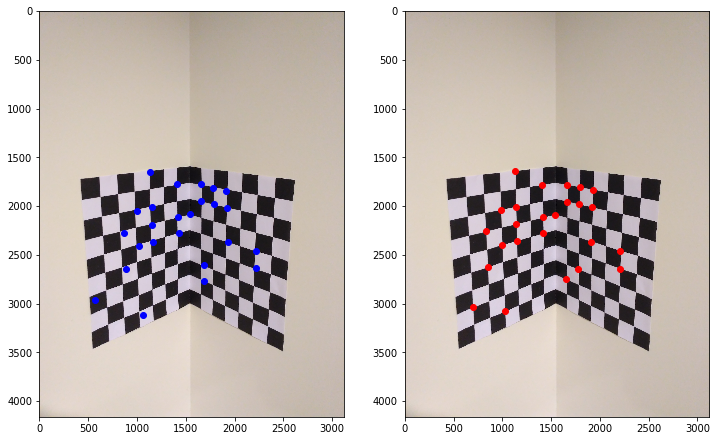

In [161]:
f, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].imshow(plt.imread("../calibration-data/calib-object.jpg"))
axarr[1].imshow(plt.imread("../calibration-data/calib-object.jpg"))
for i in range(len(X)):
    axarr[0].plot(Reconst_matrix[0][i],Reconst_matrix[1][i], 'bo') #reconstructed

for i in range(len(X)):
    axarr[1].plot(x[i][0],x[i][1], 'ro') # original

In [163]:
# Error
mse = 0
for i in range(12):
    mse += (x[i, 0] - Reconst_matrix[0, i])**2 + (x[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

10.838261416804444


### Normalization of Image Points

    x_ = T.x
    X_ = U.X

In [164]:
x_, y_ = np.mean(x, axis=0)
print(x_, y_)
d_ = 0
n = len(x)
for i in range(n):
    d_ += np.sqrt( (x[i, 0] - x_)**2 + (x[i, 1] - y_)**2 )
    
d_ = d_/n
print(d_)
var = np.sqrt(2) / d_
print(var)
T = [[var, 0, -1*var*x_], [0, var, -1*var*y_], [0, 0, 1]]
T = np.array(T)
print(T)

1450.08 2244.6
523.3825294682172
0.002702064900427622
[[ 2.70206490e-03  0.00000000e+00 -3.91821027e+00]
 [ 0.00000000e+00  2.70206490e-03 -6.06505488e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Normalization of world points

In [165]:
X_, Y_, Z_ = np.mean(X, axis=0)
print(X_, Y_, Z_)
D_ = 0
n = len(X)
for i in range(n):
    D_ += np.sqrt( (X[i, 0] - X_)**2 + (X[i, 1] - Y_)**2 + (X[i, 2] - Z_)**2 )
    
D_ = D_/n
print(D_)

var = np.sqrt(3) / D_
print(var)

U = [[var, 0, 0, -1*var*X_], [0, var, 0, -1*var*Y_], [0, 0, var, -1*var*Z_], [0, 0, 0, 1]]
U = np.array(U)
print(U)

30.24 92.96 49.28
85.89205891551052
0.020165435890559386
[[ 0.02016544  0.          0.         -0.60980278]
 [ 0.          0.02016544  0.         -1.87457892]
 [ 0.          0.          0.02016544 -0.99375268]
 [ 0.          0.          0.          1.        ]]


### Q1.1.b : Perform reconstruction on the normalized data points (without denormalizing the projection matrix obtained)

In [166]:
xx = np.c_[ x, np.ones(x.shape[0]) ] 
XX = np.c_[ X, np.ones(X.shape[0]) ]  
nx = np.matmul(T, xx.T)
nX = np.matmul(U, XX.T)
nx = nx.T
nX = nX.T

In [167]:
P = find_P(nx, nX) 
print(nX.shape)
Reconst_matrix = np.matmul(P, nX.T)
print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
print(Reconst_matrix)

(50, 12)
(25, 4)
(3, 25)
[[-0.90039538  0.23577567  0.55540399  0.91807674  1.28553309  0.93166758
   0.57190448  1.29613618  2.05228017  2.04811217  1.31681847  0.65047814
   0.6352663  -0.14186431 -0.09698717 -0.07510469 -0.780936   -1.15942865
  -0.81001902 -0.83961409 -1.22637748 -1.59430465 -1.519695   -2.32012775
  -1.03240513]
 [-1.64798981 -0.46736321 -1.28982363 -1.1794203  -1.06756076 -0.70560151
  -0.81815102 -0.59157991  1.03436661  0.57765912  0.33686388  1.427906
   0.99306975 -1.3158668  -0.36465696  0.09916107  0.33921346  0.46793836
  -0.14458182 -0.63689481 -0.52985385  0.09748557  1.09949052  1.92323773
   2.36107202]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.        ]]


In [168]:
# Error
mse = 0
for i in range(12):
    mse += (nx[i, 0] - Reconst_matrix[0, i])**2 + (nx[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

0.03462496736050993


### Q1.1.c : Perform reconstruction on the original data points (with the denormalized projection matrix).

### Denormalization 

    M = inv(T) . M_ . U

In [169]:
P = find_P(nx, nX)
T_inv = y = np.linalg.inv(T)

temp = np.matmul(T_inv, P)
P_org = np.matmul(temp, U)
print(P_org)

(50, 12)
[[ 4.47223272e+00  7.28092278e-01 -5.77008000e+00  1.54584343e+03]
 [ 1.06139952e+00  6.95962769e+00 -3.30089801e-01  1.58090374e+03]
 [-2.37497085e-04  3.04067492e-04 -8.29104604e-04  1.01977407e+00]]


In [170]:
Reconst_matrix = np.matmul(P_org, XX.T)
print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
print(Reconst_matrix)

(3, 25)
[[1.11685507e+03 1.53733759e+03 1.65562798e+03 1.78984857e+03
  1.92583952e+03 1.79487837e+03 1.66173460e+03 1.92976359e+03
  2.20960290e+03 2.20806038e+03 1.93741784e+03 1.69081372e+03
  1.68518401e+03 1.39757782e+03 1.41418628e+03 1.42228470e+03
  1.16106548e+03 1.02099014e+03 1.15030222e+03 1.13934946e+03
  9.96213225e+02 8.60048039e+02 8.87660127e+02 5.91430104e+02
  1.06799993e+03]
 [1.63469984e+03 2.07163480e+03 1.76725261e+03 1.80811148e+03
  1.84950928e+03 1.98346582e+03 1.94181267e+03 2.02566377e+03
  2.62740598e+03 2.45838433e+03 2.36926906e+03 2.77304993e+03
  2.61212254e+03 1.75761436e+03 2.10964508e+03 2.28129826e+03
  2.37013861e+03 2.41777806e+03 2.19109210e+03 2.00889330e+03
  2.04850780e+03 2.28067818e+03 2.65150752e+03 2.95636593e+03
  3.11840285e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.0000000

In [171]:
# Error
mse = 0
for i in range(12):
    mse += (x[i, 0] - Reconst_matrix[0, i])**2 + (x[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

12.81426192058909


Observations:

        Q1.1.a) error = 10.838261416804444
        Q1.1.b) error = 0.03462496736050993
        Q1.1.b) error = 12.81426192058909

1. When we normalize the world point and image point, the error decreases from 10 to 0.03. Hence, Normalization is good.
2. Reconstruction on the original data points with the denormalized projection matrix, matrix increases the error but it is negligible.

### Q1.1 - for Scale = 2800 * 2800 mm

In [178]:
X = 100*X

### Q1.1.a

In [175]:
P = find_P(x, X)
Xx = np.c_[ X, np.ones(X.shape[0]) ]  
# print(Xx.shape)
Reconst_matrix = np.matmul(P, Xx.T)
# print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
# print(Reconst_matrix)
# Error
mse = 0
for i in range(12):
    mse += (x[i, 0] - Reconst_matrix[0, i])**2 + (x[i, 1] - Reconst_matrix[1, i])**2 
    
print("error :", np.sqrt(mse/len(x)))

(50, 12)
error : 10.838350251384655


### Q1.1.b

In [176]:
xx = np.c_[ x, np.ones(x.shape[0]) ] 
XX = np.c_[ X, np.ones(X.shape[0]) ]  
nx = np.matmul(T, xx.T)
nX = np.matmul(U, XX.T)
nx = nx.T
nX = nX.T
P = find_P(nx, nX) 
# print(nX.shape)
Reconst_matrix = np.matmul(P, nX.T)
# print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
# print(Reconst_matrix)

# Error
mse = 0
for i in range(12):
    mse += (nx[i, 0] - Reconst_matrix[0, i])**2 + (nx[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

(50, 12)
0.03322669747969529


### Q1.1.c

In [177]:
P = find_P(nx, nX)
T_inv = y = np.linalg.inv(T)

temp = np.matmul(T_inv, P)
P_org = np.matmul(temp, U)
print(P_org)

Reconst_matrix = np.matmul(P_org, XX.T)
# print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
# print(Reconst_matrix)

# Error
mse = 0
for i in range(12):
    mse += (x[i, 0] - Reconst_matrix[0, i])**2 + (x[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

(50, 12)
[[ 3.99781563e-02  6.30506456e-03 -5.65431185e-02  1.51879677e+03]
 [ 7.02560480e-03  6.66267257e-02 -3.44431274e-03  1.55116784e+03]
 [-3.89720058e-06  2.46589788e-06 -8.28813955e-06  1.00029706e+00]]
12.296779945750686


### Scaling doesn't Affect the error

## Q1.2 : Decomposition of the projection matrix 

         P = [M : t] = K [R: -RC] = [KR : -KRC]
         M = KR

         M-1 = R-1.K-1
         qr = R-1.K-1
         R = q.T
         K = inv(r) 

         C= (M-1)*-t

In [183]:
M = P[:,:3]
t = P[:,3]
C = -np.linalg.inv(M) @ t
q,r = np.linalg.qr(np.linalg.inv(M))
R = q.T
K = np.linalg.inv(r)
K = K/K[2][2]
print(K)
print(R)
print(C)

[[5.02983116e+03 3.98245494e+02 2.37004307e+03]
 [0.00000000e+00 5.12388593e+03 1.31692322e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.81267569  0.05979449  0.57964027]
 [-0.12981629 -0.98830096 -0.08005583]
 [ 0.56807214 -0.14030618  0.81093047]]
[ 586.50780302 -168.1354256   590.24420722]


In [184]:
angle = math.pi
R_z = np.array([[math.cos(angle),-math.sin(angle),0],[math.sin(angle),math.cos(angle),0],[0,0,1]])

In [185]:
K_ = K @ R_z
K_

array([[-5.02983116e+03, -3.98245494e+02,  2.37004307e+03],
       [ 6.27495051e-13, -5.12388593e+03,  1.31692322e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [186]:
R_ = R_z @ R
R_

array([[ 0.81267569, -0.05979449, -0.57964027],
       [ 0.12981629,  0.98830096,  0.08005583],
       [ 0.56807214, -0.14030618,  0.81093047]])

### Proof:

In [187]:
mat = R_z @ R_z # identity matrix
mat

array([[ 1.0000000e+00,  2.4492936e-16,  0.0000000e+00],
       [-2.4492936e-16,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

    K'R' = (K.R_z)(R_z.R) = K(R_z.R_z)R = KR, since R_z*R_z=I
    
Hence, this is valid for the above transformation

In [188]:
K_

array([[-5.02983116e+03, -3.98245494e+02,  2.37004307e+03],
       [ 6.27495051e-13, -5.12388593e+03,  1.31692322e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [189]:
c= -5.02983116e+03
xh = 2.37004307e+03
yh = 1.31692322e+03
s = K_[0,1]/c
m = (K_[1, 1]/c) -1

print("c = ", c)
print("xh = ", xh)
print("yh = ", yh)
print("s = ", s)
print("m = ", m)

c =  -5029.83116
xh =  2370.04307
yh =  1316.92322
s =  0.07917671210638487
m =  0.018699389461402705


## Q1.3 - RANSAC

### Q1.3.a : Implementation

In [199]:
size = 6 # number of points to be selected
itr = 20
n = X.shape[0]
max_inliers = 0
P_best = np.zeros((3,4))


for i in range(itr):
    sample = np.random.choice(n,size)
    sX = X[sample]
    sx = x[sample]
    P_s = find_P(sx,sX)
    inliers = 0

    for j in range(n):
        Xp = np.append(X[j],1)
        xp = np.append(x[j],1)
        x_ = P @ Xp.T
        x_ = x_/x_[2]
        
        error = np.linalg.norm(xp-x_)
        
        if(error<15):
            inliers += 1
    
    if(inliers>max_inliers):
        max_inliers = inliers
        P_best = P_s

### Q.1.3.b : What is the minimum number of iterations you will have to run RANSAC for getting probability of success greater than 95%?

In [16]:
size = 6 # number of points to be selected
itr = 100
n = X.shape[0]
max_inliers = 0
P_best = np.zeros((3,4))
itr_best=0

for i in range(itr):
    sample = np.random.choice(n,size)
    sX = X[sample]
    sx = x[sample]
    P_s = find_P(sx,sX)
    inliers = 0
  
    for j in range(n):
        Xp = np.append(X[j],1)
        xp = np.append(x[j],1)
        x_ = P_s @ Xp.T
        x_ = x_/x_[2]
        error = np.linalg.norm(xp-x_)
        
        if(error<15):
            inliers += 1
    
    p = inliers / size
    if(p >= 0.95):
        max_inliers = np.max(inliers, max_inliers)
        P_best = P_s
        itr_best = i
        break
        
print(itr_best)

4


In [33]:
P_s

array([[ 3.86105722e+00, -5.25111501e-01, -4.82176694e+00,
         1.51940511e+03],
       [ 6.17868647e-01,  3.97829051e+00,  6.09616833e-01,
         1.62435632e+03],
       [-1.72343481e-04, -7.38216931e-04,  3.99370528e-05,
         1.00000000e+00]])

## Conclusion:

1. Error is reduced using ransac
2. Good Accuracy

### Q.1.3.c : Probability of success of RANSAC vs Number of iterations required

## Q1.4 (Bonus)

In [ ]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(X, x, (img.shape[1],img.shape[0]), None, None)

print("Error : ", retval)
print("Matrix : ", cameraMatrix)
print("Distortion coefficients : ", distCoeffs)

# Q2 : Zhang's Method

## Q2.1 :

    Use checkerboard images IMG5456.JPG - IMG5470.JPG and perform camera calibration using Zhang’s Method

In [2]:
x,y=np.meshgrid(range(8),range(6))
x_coord = x.reshape(48,1)
y_coord = y.reshape(48,1)
z_coord = np.zeros((48,1))

X = np.hstack((x_coord, y_coord, z_coord)).astype(np.float32)
# print(X)

In [3]:
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)

In [4]:
n=15
image_points = []
world_points = []
ind = 5456
for i in range(n):
    img = cv2.imread("../calibration-data/IMG_"+str(ind+i)+".JPG")
    retval, corners = cv2.findChessboardCorners(img, (8, 6), None)
    if retval:
        image_points.append(corners)
        world_points.append(X)

# for i in range(n):
#     world_points.append(X)

In [5]:
len(world_points)

15

### Camera Calibration

In [6]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(world_points, image_points, (img.shape[1],img.shape[0]), None, None)

print("Error : ", retval)
print("Matrix : ", cameraMatrix)
print("Distortion coefficients : ", distCoeffs)

Error :  2.4810222497615952
Matrix :  [[1.36634816e+04 0.00000000e+00 3.33651275e+03]
 [0.00000000e+00 1.36813888e+04 1.49657985e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients :  [[ 9.51409607e-02  1.01150408e+01 -1.52797290e-02  2.87204086e-02
  -1.60701382e+02]]


## Q.2.2 :

    Using the estimated camera parameters compute the image points and overlay a
    wireframe over the actual image of chessboard using straight lines between the
    computed points.

In [7]:
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

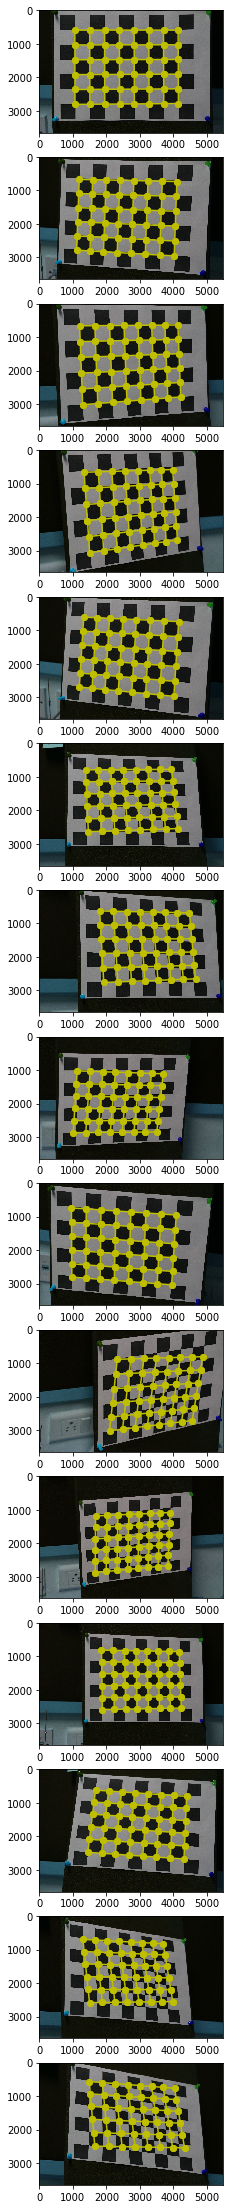

In [8]:
Xx = np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)),np.ones((48,1))))
Xx = Xx.astype(np.float32)
fig, axs = plt.subplots(15, figsize=(40, 40))
for c in range(15):
    img = cv2.imread("../calibration-data/IMG_"+str(ind+c)+".JPG")
    r = rvecs[c]
    t = tvecs[c]
    
    R = eulerAnglesToRotationMatrix(r)
    P = np.zeros((3,4))
    P[0:3,0:3] = R[0:3,0:3]
    P[:,3] = t[:,0]
    P = cameraMatrix @ P
    P = P/P[2,3]

    wireframe = []
    for i in range(48):
        projection = np.dot(P, Xx[i])
        projection = projection / projection[2]
        wireframe.append([projection[0], projection[1]])
    wireframe = np.array(wireframe)

    for i in range(wireframe.shape[0]):    
        if i%8 != 0 and i>0:
            axs[c].plot([wireframe[i][0], wireframe[i-1][0]], [wireframe[i][1], wireframe[i-1][1]], 'yo-')
        if i+8 < wireframe.shape[0]:
            axs[c].plot([wireframe[i][0], wireframe[i+8][0]], [wireframe[i][1], wireframe[i+8][1]], 'yo-') 
            
    axs[c].imshow(img)


### Observation: If image is taken at a large angle, then wireframe does not fit accurately.

# Q3: DIY (Cardboard box image)

In [205]:
X = [
    [0, 0, 0],
    [1, 0, 0],
    [2, 0, 0],
    [3, 0, 0],
    [5, 0, 0],
    [0, 1, 0],
    [0, 3, 0],
    [0, 5, 0],
    [0, 6, 0],
    [0, 0, 1],
    [0, 0, 2],
    [0, 0, 3],
    [0, 4, 3],
    [7, 0, 3],
    [0, 6, 3]
]

x = [
    [787, 617],
    [850, 544],
    [905, 481],
    [950, 424],
    [1033, 328],
    [680, 556],
    [507, 456],
    [359, 373],
    [297, 334],
    [765, 697],
    [754, 766],
    [748, 815],
    [413, 598],
    [1020, 459],
    [292, 513]
]

X = np.array(X)
X = 28*X
x = np.array(x)
print(X.shape)
print(x.shape)

(15, 3)
(15, 2)


In [206]:
P = find_P(x, X) 
Xx = np.c_[ X, np.ones(X.shape[0]) ]  
print(Xx.shape)
Reconst_matrix = np.matmul(P, Xx.T)
print(Reconst_matrix.shape)
Reconst_matrix = Reconst_matrix/Reconst_matrix[2]
print(Reconst_matrix)

(15, 4)
(3, 15)
[[7.97075120e+02 8.50265925e+02 9.00000588e+02 9.46605360e+02
  1.03153708e+03 6.86027387e+02 5.02423779e+02 3.56853419e+02
  2.94819479e+02 7.74427004e+02 7.53788210e+02 7.34902699e+02
  4.13729380e+02 1.02311055e+03 2.96157906e+02]
 [6.12969302e+02 5.48807836e+02 4.88815346e+02 4.32598289e+02
  3.30149311e+02 5.51658685e+02 4.50289210e+02 3.69918290e+02
  3.35668702e+02 6.89848005e+02 7.59906093e+02 8.24012689e+02
  5.98576776e+02 4.52543402e+02 5.16051762e+02]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]]


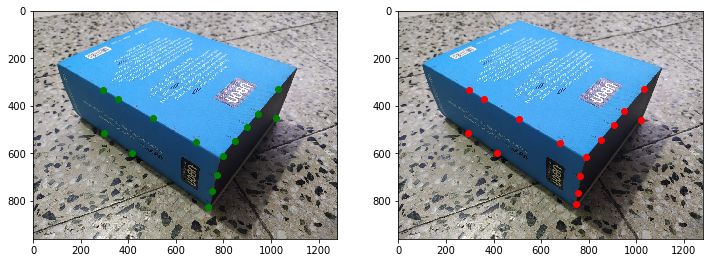

In [202]:
f, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].imshow(plt.imread("../images/cardboard_box.jpeg"))
axarr[1].imshow(plt.imread("../images/cardboard_box.jpeg"))
for i in range(len(X)):
    axarr[0].plot(Reconst_matrix[0][i],Reconst_matrix[1][i], 'go')

for i in range(len(X)):
    axarr[1].plot(x[i][0],x[i][1], 'ro')


In [207]:
# Error
mse = 0
for i in range(12):
    mse += (x[i, 0] - Reconst_matrix[0, i])**2 + (x[i, 1] - Reconst_matrix[1, i])**2 
    
print(np.sqrt(mse/len(x)))

7.657551159561472


## Ransac

In [35]:
size = 6 # number of points to be selected
itr = 20
n = X.shape[0]
max_inliers = 0
error_best = 0
P_best = np.zeros((3,4))


for i in range(itr):
    sample = np.random.choice(n,size)
    sX = X[sample]
    sx = x[sample]
    P_s = find_P(sx,sX)
    inliers = 0
    error_sum = 0
    for j in range(n):
        Xp = np.append(X[j],1)
        xp = np.append(x[j],1)
        x_ = P @ Xp.T
        x_ = x_/x_[2]
        error = np.linalg.norm(xp-x_)
        error_sum += error
        if(error<15):
            inliers += 1
    
    if(inliers>max_inliers):
        max_inliers = inliers
        P_best = P_s
        error_best = error

In [209]:
P_best

array([[ 3.45171447e+13, -2.32390738e+00,  1.06548987e+00,
         7.86714187e+02],
       [ 1.09599453e+13, -1.05928529e+00,  4.54943874e+00,
         6.17457959e+02],
       [ 3.34144673e+10,  1.00517912e-03,  1.75906346e-03,
         1.00000000e+00]])

In [210]:
error_best

5.157657418596824

## Hence, error is reduced with ransac (7.65 to 5.15)